<a href="https://colab.research.google.com/github/Carlos1729/Transformers_Code/blob/main/Instruction_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jsonlines

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.0 MB/s eta 0:00:00


In [3]:
from google.colab import auth
import requests
import os
import yaml

def authenticate_powerml():
  auth.authenticate_user()
  gcloud_token = !gcloud auth print-access-token
  powerml_token_response = requests.get('https://api.powerml.co/v1/auth/verify_gcloud_token?token=' + gcloud_token[0])
  print(powerml_token_response)
  return powerml_token_response.json()['token']

key = authenticate_powerml()

config = {
    "production": {
        "key": key,
        "url": "https://api.powerml.co"
    }
}

keys_dir_path = '/root/.powerml'
os.makedirs(keys_dir_path, exist_ok=True)

keys_file_path = keys_dir_path + '/configure_llama.yaml'
with open(keys_file_path, 'w') as f:
  yaml.dump(config, f, default_flow_style=False)

<Response [200]>


In [4]:
!pip install --upgrade --force-reinstall --ignore-installed lamini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 79.2 MB/s eta 0:00:00
  Using cached jsonlines-4.0.0-py3-none-any.whl (8.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192

In [5]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.2
    Uninstalling huggingface-hub-0.19.2:
      Successfully uninstalled huggingface-hub-0.19.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0


In [11]:
!pip uninstall numpy
!pip install numpy

Found existing installation: numpy 1.26.2
Uninstalling numpy-1.26.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.2
  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 

In [1]:
import itertools
import jsonlines
import numpy as np

from datasets import load_dataset
from pprint import pprint

from llama import BasicModelRunner
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

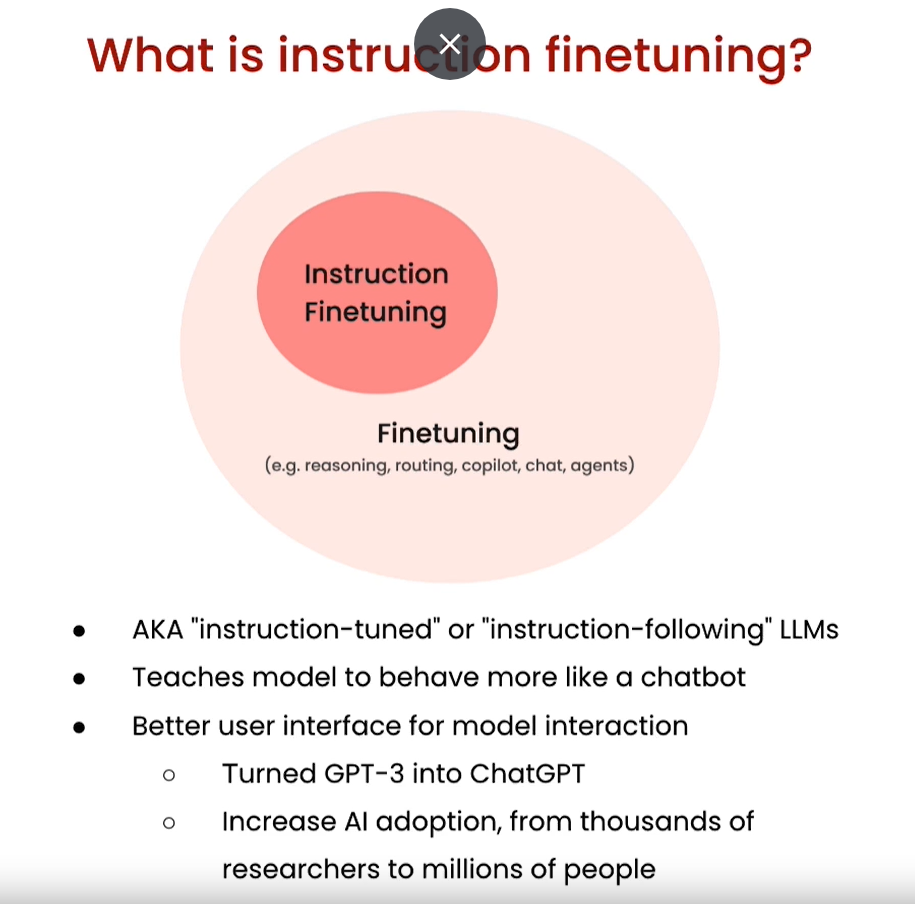

### Load instruction tuned dataset

In [2]:
instruction_tuned_dataset = load_dataset("tatsu-lab/alpaca", split="train", streaming=True)

In [3]:
m = 5
print("Instruction-tuned dataset:")
top_m = list(itertools.islice(instruction_tuned_dataset, m))
for j in top_m:
  print(j)

Instruction-tuned dataset:
{'instruction': 'Give three tips for staying healthy.', 'input': '', 'output': '1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.', 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nGive three tips for staying healthy.\n\n### Response:\n1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.'}
{'instruction': 'What are the three primary colors?', 'input': '', 'output': 'The three primary colors are red, blue, and yellow.', 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nWhat are the three p

### Two prompt templates of Alpaco


In [4]:
# where a model is expected to generate responses based on given instructions and optional input.
#here instruct can be 2 nums and input 3 and 4

In [5]:
prompt_template_with_input = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""

prompt_template_without_input = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""

### Hydrate prompts (add data to prompts)

In [6]:
processed_data = []
for j in top_m:
  if not j["input"]:
    processed_prompt = prompt_template_without_input.format(instruction=j["instruction"])
  else:
    processed_prompt = prompt_template_with_input.format(instruction=j["instruction"], input=j["input"])

  processed_data.append({"input": processed_prompt, "output": j["output"]})

In [7]:
pprint(processed_data[0])

{'input': 'Below is an instruction that describes a task. Write a response '
          'that appropriately completes the request.\n'
          '\n'
          '### Instruction:\n'
          'Give three tips for staying healthy.\n'
          '\n'
          '### Response:',
 'output': '1.Eat a balanced diet and make sure to include plenty of fruits '
           'and vegetables. \n'
           '2. Exercise regularly to keep your body active and strong. \n'
           '3. Get enough sleep and maintain a consistent sleep schedule.'}


In [8]:
with jsonlines.open(f'alpaca_processed.jsonl', 'w') as writer:
    writer.write_all(processed_data)

In [9]:
dataset_path_hf = "lamini/alpaca"
dataset_hf = load_dataset(dataset_path_hf)
print(dataset_hf)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 52002
    })
})


In [10]:
dataset_hf

DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 52002
    })
})

In [11]:
dataset_hf['train']

Dataset({
    features: ['input', 'output'],
    num_rows: 52002
})

In [12]:
dataset_hf['train'][0]

{'input': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nGive three tips for staying healthy.\n\n### Response:',
 'output': '1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.'}

In [13]:
dstopd = dataset_hf["train"].to_pandas()

In [14]:
dstopd

,input,output
0,Below is an instruction that describes a task....,1.Eat a balanced diet and make sure to include...
1,Below is an instruction that describes a task....,"The three primary colors are red, blue, and ye..."
2,Below is an instruction that describes a task....,"An atom is made up of a nucleus, which contain..."
3,Below is an instruction that describes a task....,There are a number of ways to reduce air pollu...
4,Below is an instruction that describes a task....,I had to make a difficult decision when I was ...
...,...,...
51997,Below is an instruction that describes a task....,"Jean Tremaine\n1234 Main Street, Anytown, CA 9..."
51998,"Below is an instruction that describes a task,...",I eating cake.
51999,"Below is an instruction that describes a task,...",Michelle Obama is an inspirational woman who r...
52000,Below is an instruction that describes a task....,1. Research potential opportunities and carefu...


In [15]:
non_instruct_model = BasicModelRunner("meta-llama/Llama-2-7b-hf")
non_instruct_output = non_instruct_model("Tell me how to train my dog to sit")
print("Not instruction-tuned output (Llama 2 Base):", non_instruct_output)

Not instruction-tuned output (Llama 2 Base): .
Tell me how to train my dog to sit. I have a 10 month old puppy and I want to train him to sit. I have tried the treat method and he just sits there and looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks


In [16]:
instruct_model = BasicModelRunner("meta-llama/Llama-2-7b-chat-hf")
instruct_output = instruct_model("Tell me how to train my dog to sit")
print("Instruction-tuned output (Llama 2): ", instruct_output)

Instruction-tuned output (Llama 2):   on command.
Training a dog to sit on command is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit on command:

1. Choose a quiet and distraction-free area: Find a quiet area with minimal distractions where your dog can focus on you.
2. Have treats ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in front of your dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the treat up and back: Slowly move the treat up and back, towards your dog's tail, while saying "sit" in a calm and clear voice.
5. Dog will sit: As you move the treat, your dog will naturally sit down to follow the treat. The moment their bottom touches the ground, say "good sit" and give them the treat.
6. Repeat the process: Repeat steps 3-5 several times, so your dog starts to associate the command "sit" with


In [20]:
chatgpt = BasicModelRunner("chat-gpt")
instruct_output_chatgpt = chatgpt("Tell me how to train my dog to sit")
print("Instruction-tuned output (ChatGPT): ", instruct_output_chatgpt)

status code: 400


UserError: ignored

### Try smaller models

In [21]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")#70m non instruction tuned model
model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-70m")

In [22]:
def inference(text, model, tokenizer, max_input_tokens=1000, max_output_tokens=100):
  # Tokenize
  input_ids = tokenizer.encode(
          text,
          return_tensors="pt",#Setting it to "pt" indicates that the resulting tensors should be PyTorch tensors
          truncation=True,
          max_length=max_input_tokens
  )#tokenizer to encode a given text into numerical tokens, specifically using the encode method from the Hugging Face Transformers library.
  #This variable holds the resulting encoded representation of the input text in the form of token IDs.

  # Generate
  device = model.device
  generated_tokens_with_prompt = model.generate(
    input_ids=input_ids.to(device),
    max_length=max_output_tokens
  )
# Generating Text:
# The model's generate method is called with the tokenized prompt as input. It generates additional tokens based on the provided input.

  # Decoding Tokens:
  #The generated tokens are decoded into human-readable text using the decode method of the tokenizer.
  generated_text_with_prompt = tokenizer.batch_decode(generated_tokens_with_prompt, skip_special_tokens=True)

  # Strip the prompt
  generated_text_answer = generated_text_with_prompt[0][len(text):]

  return generated_text_answer

In [23]:
#Till now the model is not trained on any given dataset

In [24]:
finetuning_dataset_path = "lamini/lamini_docs"
finetuning_dataset = load_dataset(finetuning_dataset_path)
print(finetuning_dataset)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/140 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 140
    })
})


In [28]:
test_sample = finetuning_dataset["test"][0]
print(test_sample)

print(inference(test_sample["question"], model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


{'question': 'Can Lamini generate technical documentation or user manuals for software projects?', 'answer': 'Yes, Lamini can generate technical documentation and user manuals for software projects. It uses natural language generation techniques to create clear and concise documentation that is easy to understand for both technical and non-technical users. This can save developers a significant amount of time and effort in creating documentation, allowing them to focus on other aspects of their projects.', 'input_ids': [5804, 418, 4988, 74, 6635, 7681, 10097, 390, 2608, 11595, 84, 323, 3694, 6493, 32, 4374, 13, 418, 4988, 74, 476, 6635, 7681, 10097, 285, 2608, 11595, 84, 323, 3694, 6493, 15, 733, 4648, 3626, 3448, 5978, 5609, 281, 2794, 2590, 285, 44003, 10097, 326, 310, 3477, 281, 2096, 323, 1097, 7681, 285, 1327, 14, 48746, 4212, 15, 831, 476, 5321, 12259, 247, 1534, 2408, 273, 673, 285, 3434, 275, 6153, 10097, 13, 6941, 731, 281, 2770, 327, 643, 7794, 273, 616, 6493, 15], 'attention

In [25]:
#Now load fine tuned models

In [26]:
instruction_model = AutoModelForCausalLM.from_pretrained("lamini/lamini_docs_finetuned")

In [29]:
print(inference(test_sample["question"], instruction_model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Yes, Lamini can generate technical documentation or user manuals for software projects. This can be achieved by providing a prompt for a specific technical question or question to the LLM Engine, or by providing a prompt for a specific technical question or question. Additionally, Lamini can be trained on specific technical questions or questions to help users understand the process and provide feedback to the LLM Engine. Additionally, Lamini


In [30]:
# Pssst! If you were curious how to upload your own dataset to Huggingface
# Here is how we did it

# !pip install huggingface_hub
# !huggingface-cli login

# import pandas as pd
# import datasets
# from datasets import Dataset

# finetuning_dataset = Dataset.from_pandas(pd.DataFrame(data=finetuning_dataset))
# finetuning_dataset.push_to_hub(dataset_path_hf)